In [43]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [27]:
data = Path("base_5_data.csv")

In [28]:
og_data = pd.read_csv(data)
og_data.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,723,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,724,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,725,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,726,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,727,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [29]:
# Columns we're interested in:
og_data = og_data[['brand','model','color','registration_date','year','price_in_euro','power_ps',
                   'transmission_type','fuel_type','fuel_consumption_l_100km','mileage_in_km']]
og_data.head()

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [30]:
og_data.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                          int64
price_in_euro                 int64
power_ps                      int64
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km    float64
mileage_in_km               float64
dtype: object

In [31]:
og_data.count()

brand                       88616
model                       88616
color                       88616
registration_date           88616
year                        88616
price_in_euro               88616
power_ps                    88616
transmission_type           88616
fuel_type                   88616
fuel_consumption_l_100km    88616
mileage_in_km               88616
dtype: int64

In [32]:
# Dropping aal the na values 
og_data1 = og_data.dropna()
og_data1.count()

brand                       88616
model                       88616
color                       88616
registration_date           88616
year                        88616
price_in_euro               88616
power_ps                    88616
transmission_type           88616
fuel_type                   88616
fuel_consumption_l_100km    88616
mileage_in_km               88616
dtype: int64

In [33]:
og_data1.head()

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [34]:
og_data1['fuel_consumption_l_100km']

0        9.2
1        7.4
2        5.5
3        6.1
4        9.8
        ... 
88611    7.4
88612    5.6
88613    5.6
88614    7.6
88615    4.7
Name: fuel_consumption_l_100km, Length: 88616, dtype: float64

In [35]:
# Dropping numeric values from the fuel_type 
og_data1 = og_data1[~og_data1['fuel_type'].str.contains(r'\d')]

In [36]:
# Dropping other unwanted values from the fuel_type 
values_to_drop = ['Automatic', 'Manual', 'Other', 'Unknown']

og_data1 = og_data1[~og_data1['fuel_type'].isin(values_to_drop)]

In [37]:
# Dropping rows with unknown values from the transmission_type 
values_to_drop1 = ['Unknown']

og_data1 = og_data1[~og_data1['transmission_type'].isin(values_to_drop1)]

In [38]:
# Dropping rows with un-realistic fuel consumption figures from the column fuel_consumption_l_100km

og_data1 = og_data1[og_data1['fuel_consumption_l_100km'] <= 30]

In [39]:
# Saving new clean csv 
og_data1.to_csv('daryl_5y.csv', index=False)

In [40]:
og_data1.count()

brand                       88260
model                       88260
color                       88260
registration_date           88260
year                        88260
price_in_euro               88260
power_ps                    88260
transmission_type           88260
fuel_type                   88260
fuel_consumption_l_100km    88260
mileage_in_km               88260
dtype: int64

In [41]:
print(og_data1['year'].unique())

[2019 2020 2021 2022 2023]


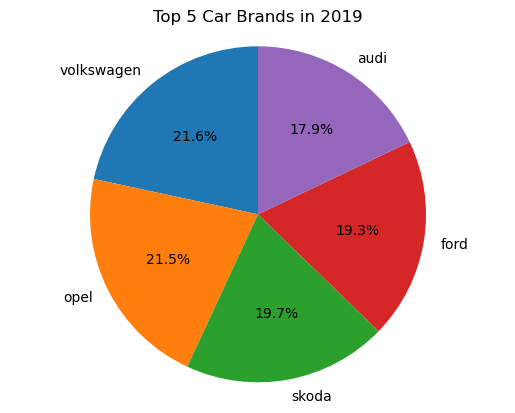

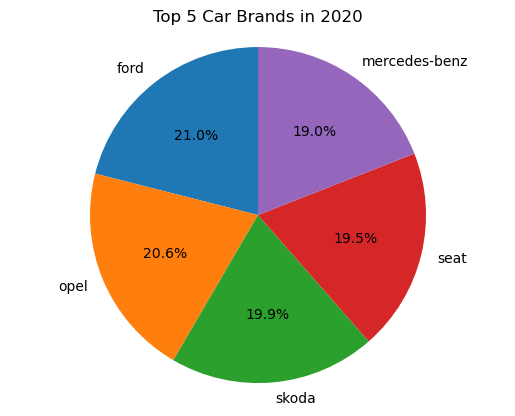

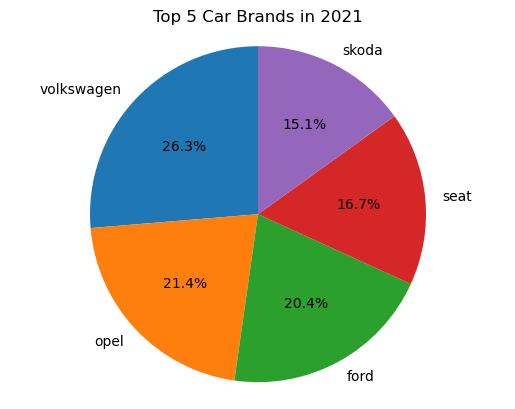

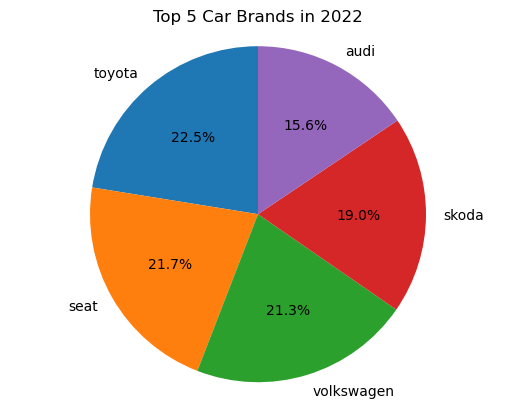

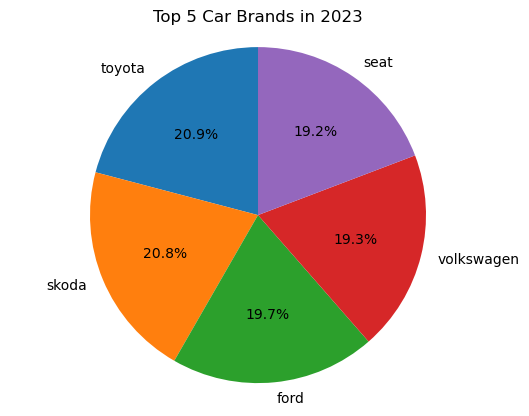

In [44]:
# Convert 'year' column to numeric data type to get rid of errors
og_data1['year'] = pd.to_numeric(og_data1['year'], errors='coerce')

# Group the data by 'year' and 'brand' to calculate the number of registrations for each brand in each year
brand_registrations = og_data1.groupby(['year', 'brand']).size().reset_index(name='registrations')

# Sort the data in descending order to find the top 3 brands for each year
top_5_brands_by_year = brand_registrations.sort_values(by=['year', 'registrations'], ascending=[True, False]).groupby('year').head(5)

# Plot a pie chart for each year with the top 3 brands
years = top_5_brands_by_year['year'].unique()
for year in years:
    data_for_year = top_5_brands_by_year[top_5_brands_by_year['year'] == year]
    plt.figure()
    plt.pie(data_for_year['registrations'], labels=data_for_year['brand'], autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 Car Brands in {year}")
    plt.axis('equal')
    plt.show()


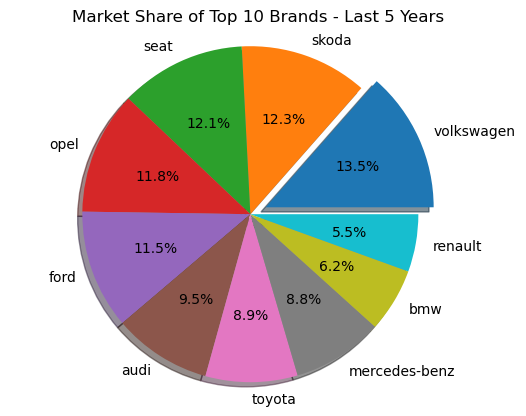

In [52]:
market_share = og_data1['brand'].value_counts().head(10)
#Explode parameters
numero_uno = market_share.idxmax()

explode = [0.1 if brand == numero_uno else 0 for brand in market_share.index]

# Plot a pie chart showing the market share of each brand
plt.figure()
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=0, explode=explode, shadow=True)
plt.title("Market Share of Top 10 Brands - Last 5 Years")
plt.axis('equal')
plt.show()

In [46]:
sale_count = og_data1.brand.value_counts()
print(sale_count)

volkswagen       7731
skoda            7044
seat             6924
opel             6773
ford             6557
audi             5421
toyota           5068
mercedes-benz    5016
bmw              3524
renault          3165
kia              2938
hyundai          2810
peugeot          2698
fiat             2582
mazda            2315
volvo            2113
mini             1986
citroen          1911
nissan           1831
land-rover       1817
dacia            1672
jeep             1116
porsche           936
jaguar            900
alfa-romeo        652
mitsubishi        541
honda             321
maserati          299
bentley           223
dodge             223
smart             210
ssangyong         194
lamborghini       168
ferrari           138
isuzu             124
aston-martin      108
lada               79
cadillac           62
chevrolet          44
chrysler           17
infiniti            8
rover               1
Name: brand, dtype: int64


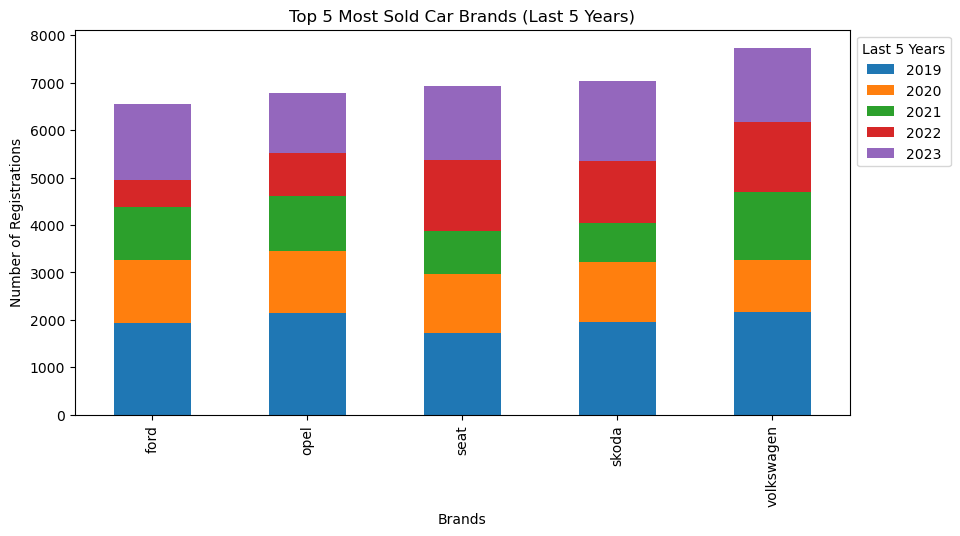

In [69]:
# Which is the most favorite Brand - Bar chart
# Calculate the number of registrations for each car model in the last 5 years
top_brands = og_data1['brand'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 models
top_brands_data = og_data1[og_data1['brand'].isin(top_brands)]

# Group the data by model and year and count the number of registrations for each combination
brands_year_counts = top_brands_data.groupby(['brand', 'year']).size().unstack(fill_value=0)

# Plot the stacked bar chart
brands_year_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Top 5 Most Sold Car Brands (Last 5 Years)")
plt.xlabel("Brands")
plt.ylabel("Number of Registrations")
plt.legend(title='Last 5 Years', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [80]:
# Show the numbers of Top 5 Brands - Last 5 years 
brand_year_counts = top_brands_data.groupby(['brand', 'year']).size().unstack(fill_value=0)

# Display the DataFrame with the top 5 brands and their registration counts by year
print(brand_year_counts)

year        2019  2020  2021  2022  2023
brand                                   
ford         289   203   269   155   328
seat         251   189   220   207   224
skoda        156   275   130   103   132
toyota        61   118   167   517   517
volkswagen   159   163   252   250   195


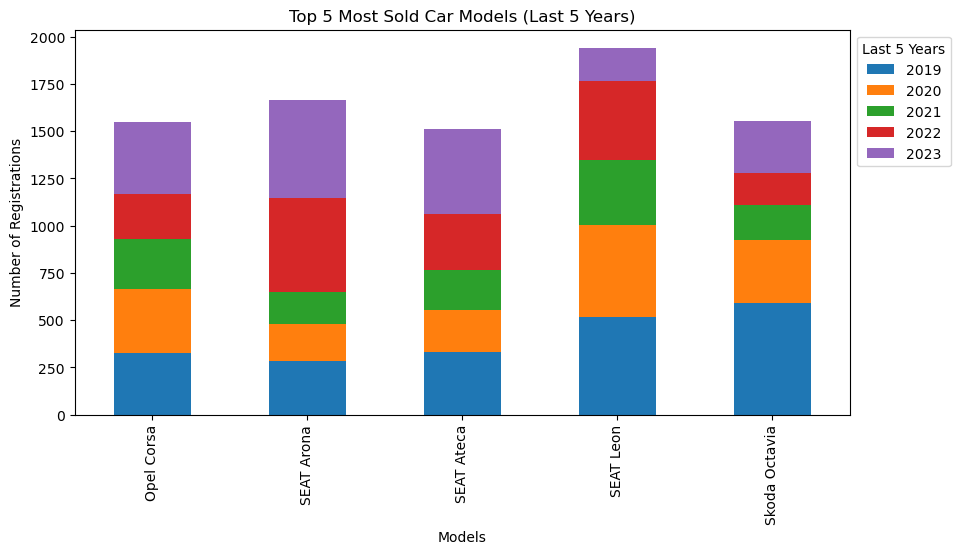

In [66]:
# Top 5 favorite Models - Bar chart

# Calculate the number of registrations for each car model in the last 5 years
top_models = og_data1['model'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 models
top_models_data = og_data1[og_data1['model'].isin(top_models)]

# Group the data by model and year and count the number of registrations for each combination
model_year_counts = top_models_data.groupby(['model', 'year']).size().unstack(fill_value=0)

# Plot the stacked bar chart
model_year_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Top 5 Most Sold Car Models (Last 5 Years)")
plt.xlabel("Models")
plt.ylabel("Number of Registrations")
plt.legend(title='Last 5 Years', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
